<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S2_C4_RDG_Marketing_target_Income_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Implementing RGD

In [ ]:
import pandas as pd  # Para el manejo de los datos
import numpy as np # Para el manejo de operaciones entre datos, y las columnas
import matplotlib.pyplot as plt # Para el manejo de las graficas
import seaborn as sns # Para el manejo de graficas

## Activity 1: Import Necessary Libraries

In [ ]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_BootCamp_IA/DataSET')

#mostar lista de archivos
os.listdir()

['marketing_campaign.xlsx',
 'marketing_campaign.csv',
 'linear_regression_model.pkl',
 'marketing_extract_2X_Income.xlsx']

In [ ]:
df = pd.read_excel('marketing_extract_2X_Income.xlsx')

## Activity 2: Load and Explore the Dataset

In [ ]:
df.info()

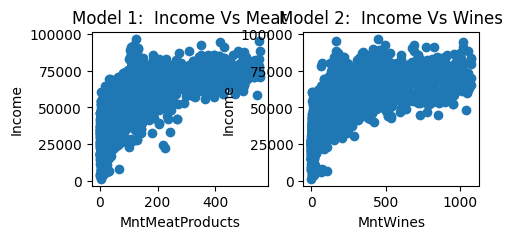

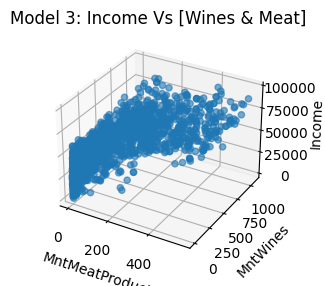

In [ ]:
plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('Model 1:  Income Vs Meat')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')


plt.subplot(1,2,2)
plt.scatter(df['MntWines'],df['Income'])
plt.title('Model 2:  Income Vs Wines')
plt.xlabel('MntWines')
plt.ylabel('Income')

fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['MntMeatProducts'],df['MntWines'],df['Income'], alpha = 0.6)
ax.set_xlabel('MntMeatProducts')
ax.set_ylabel('MntWines')
ax.set_zlabel('Income')
ax.set_title('Model 3: Income Vs [Wines & Meat]')
plt.show()

## Activity 3: Preprocess Data

In [ ]:
# --- >  Eliminar datos átipicos de Income
#---------------------------------------
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['Income'] < (Q1-1.5*IQR))|(df['Income'] > (Q3+1.5*IQR)))]

In [ ]:
# --- >  Eliminar datos átipicos de MntMeatProducts
#---------------------------------------
Q1 = df['MntMeatProducts'].quantile(0.25)
Q3 = df['MntMeatProducts'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntMeatProducts'] < (Q1-1.5*IQR))|(df['MntMeatProducts'] > (Q3+1.5*IQR)))]

In [ ]:
# --- >  Eliminar datos átipicos de MntWines
#---------------------------------------
Q1 = df['MntWines'].quantile(0.25)
Q3 = df['MntWines'].quantile(0.75)
IQR = Q3 - Q1
# ~ en la lógica booleana representa negación
# | representa el OR ( o uno o el otro, se tiene cumplir una única condición)
# & representa AND ( uno Y el otro se tienen que cumplir dos condiciones)
df = df[~((df['MntWines'] < (Q1-1.5*IQR))|(df['MntWines'] > (Q3+1.5*IQR)))]

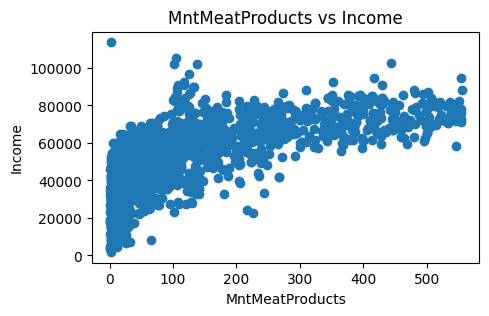

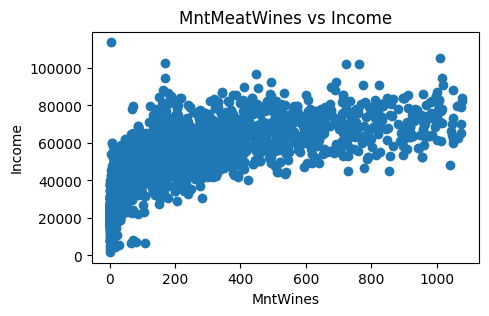

In [ ]:

plt.figure(figsize=(5,3))
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntMeatWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

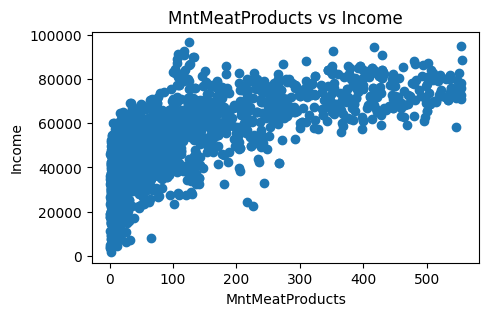

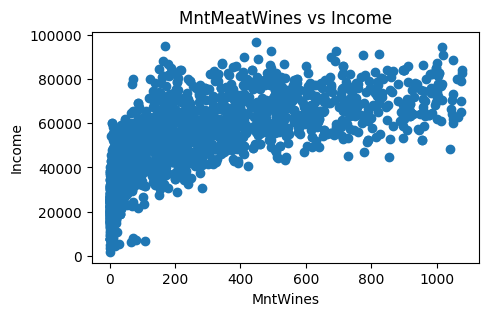

In [ ]:
df = df[df['Income']< 100000]

plt.figure(figsize=(5,3))
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.title('MntMeatProducts vs Income')
plt.xlabel('MntMeatProducts')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(df['MntWines'],df['Income'])
plt.title('MntMeatWines vs Income')
plt.xlabel('MntWines')
plt.ylabel('Income')
plt.show()

# Activity 4: Implement a Gradient Descent Regression Iteration

In [ ]:
# Inicializar parámetros
theta = 80
intercept = 5000

In [ ]:
# y = b + mX
# h = b + Theta(X1)
# h = theta_0 + theta_1(X1)
df['Hipotesis'] = intercept + theta * df['MntMeatProducts']

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

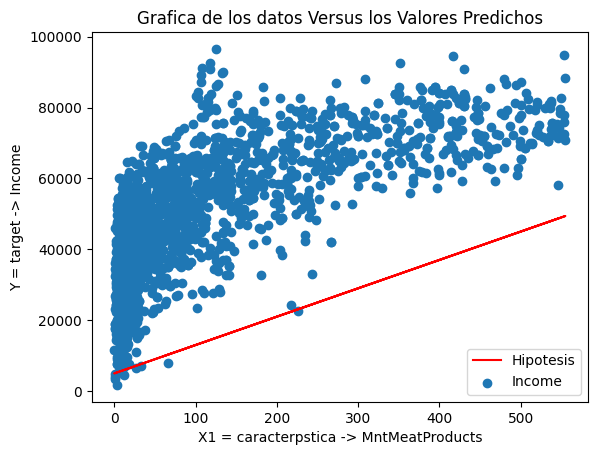

In [ ]:
plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = caracterpstica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [ ]:
# Calcule el error cuadratico medio MSE = cost = lost
# MSE = ((h-y)^2)/m
h = df['Hipotesis']
Y = df['Income']
X1 = df['MntMeatProducts']
m = len(df)
MSE = np.mean((h-Y)**2)
MSE = print( f'El error cuadratico medio es: {round(MSE,2)}')

El error cuadratico medio es: 1365248812.66


In [ ]:
# Actualice los parámetros
theta_0 = intercept
theta_1 = theta
alpha = 0.0001 # Este valor entre 0 y 1

In [ ]:
theta_0

5000

In [ ]:
# Actualización de theta_0
theta_0 = theta_0 - alpha * (2/m) * np.sum((h-Y))
theta_0

5006.875806278481

In [ ]:
theta_1

80

In [ ]:
# Actualización de theta_1
theta_1 = theta_1 - alpha * (2/m) * np.dot(X1.T,(h-Y))
theta_1

931.7064279493671

In [ ]:
# Visualice la nueva recta

In [ ]:
H_new = theta_0 + theta_1 * X1

Text(0.5, 1.0, 'Grafica de los datos Versus los Valores Predichos')

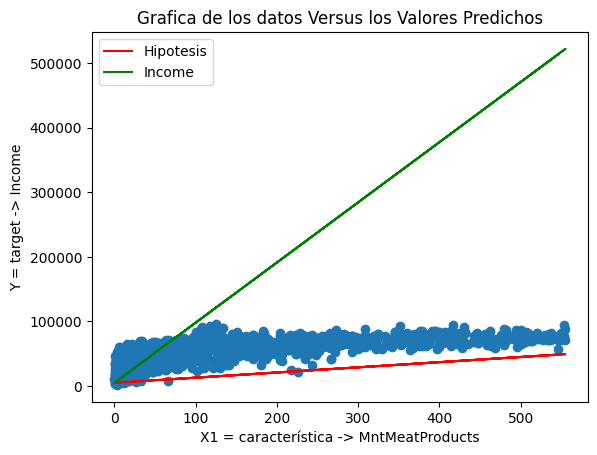

In [ ]:

plt.plot(df['MntMeatProducts'],df['Hipotesis'],color='red')
plt.plot(df['MntMeatProducts'],H_new,color='green')
plt.scatter(df['MntMeatProducts'],df['Income'])
plt.legend(['Hipotesis','Income'])
plt.xlabel('X1 = característica -> MntMeatProducts')
plt.ylabel('Y = target -> Income')
plt.title('Grafica de los datos Versus los Valores Predichos')

In [ ]:
# Calcule la bondad de ajuste
SSE = np.sum((H_new-Y)**2)
Y_mean = np.mean(Y)
SST = np.sum((Y-Y_mean)**2)
R2 = 1 - (SSE/SST)
R2

-46.011471492207995

In [ ]:
theta = np.random.randn(2,1)

In [ ]:
theta

array([[ 1.73729769],
       [-1.35269894]])

# Actividad 5. Implement a Gradient Descent Regression function

In [ ]:
from statsmodels.tools.tools import add_constant

In [ ]:
# ------ DataSet y Parámetros
#Target
Y = df['Income']
#Característica
X1 = df['MntMeatProducts']
# Hiperparámetro
alpha = 0.0001
n_iteraciones = 100

In [ ]:
# Esta función no está terminada se terminará en la siguiente clase
# Inicializar parámetros
def my_RGD(Y,X1,alpha,n_iteraciones):
  theta = np.random.randn(2,1)
  X1 = add_constant(X1)
  for i in range(n_iteraciones):
    H = np.dot(X1,theta)







## Activity 5.1: Define Cost Function

# Activity 6: Initialize Parameters and Run

# Activity 7: Plot Cost Function over Iterations

# Activity 8: Evaluate Model Performance